In [64]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Définition de nos variables modifiable (matrice d'adjacence...)

In [65]:
Types = {'electrique': 1000, 'thermique':2424}

Types_vitesseslimit = {'electrique': 200, 'thermique':150}

Types_perc = {'electrique': 0.5, 'thermique':0.5}

Proba_shortestpath = 0.8 #la proba de choisir le chemin le plus court

In [66]:
ville_1m = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ,
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]] 

In [ ]:
paris1=[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# Les fonctions 

In [67]:
def ville_graphe(ville_m,lenmin,lenmax):
    """ Retourn le graphe de la ville à partir de la matrice d'adjacence. ville_m = matrice, lenmin = longueur min des routes,
    lenmax = longueur max des route. Tire aléatoirement la longueur des routes. On suppose que les routes n'ont pas de sens.   
    """
    i = len(ville_m)
    ville_graph = nx.Graph()
    ville_graph.add_nodes_from(range(i))
    ville_graph.add_edges_from([(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1])
    for k in range(i-1):
        L= [(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1]
        for a,b in L : 
             ville_graph.add_edge(a,b, len = random.randint(lenmin,lenmax))
    pos = nx.spring_layout(ville_graph)
    nx.draw_networkx_edges(ville_graph,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(ville_graph, pos)
    nx.draw(ville_graph, pos, with_labels=True)
    return ville_graph

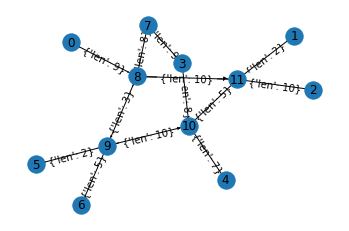

In [185]:
ville_1g = ville_graphe(ville_1m,2,10)

In [ ]:
ville_paris1=ville_graph(paris1,2,10)

In [69]:
def random_position(len_ville_1m):
    """ Retourne la valeur du node de départ et celui d'arrivée de manière aléatoire. len_ville_1m = nb_colonne matrice"""
    depart = random.randint(0,len_ville_1m -1)
    arrivee = random.randint(0,len_ville_1m -1)
    
    while(depart == arrivee):
        arrivee = random.randint(0,len_ville_1m -1)
    return (depart, arrivee)

In [70]:
random.randint(0,10)

6

In [93]:
def path_choice (proba, ville, positiondepart, positionarrivé): 
    x = random.randint(1,10)
    if x<= proba*10: 
        return nx.shortest_path(ville, source=positiondepart, target=positionarrivé, weight='len', method='dijkstra')
    else : 
        y = nx.all_simple_paths(ville, source=positiondepart, target=positionarrivé)
        L=[]
        for i in y:
            L.append(i)
        rnd = random.randint(0,len(L)-1)
        return  L[rnd]

In [95]:
class Voiture:
    """ Création d'une voiture avec ses différents parametres"""
    nbr_voiture = 0
    def __init__(self,typee,positiondepart,positionarrivé,positionactuelle,vitesse,vitesse_max,villeg):
        self.type = typee
        self.speed = vitesse 
        """position est un tuple d'un tuple de position et d'un pourcentage """
        self.position = positionactuelle
        self.positiondepart = positiondepart
        self.positionarrivé = positionarrivé
        self.vitesse_max =vitesse_max
        "chemin le plus cours a"
        self.chemin = path_choice (Proba_shortestpath,villeg,positiondepart, positionarrivé)
        Voiture.nbr_voiture += 1
    def spawn(typesperc,nbr,lenvillem,villeg):
        """ création de la population de voitures en prenant en compte le pourcentage de voitures éléctriques et terminques"""
        system=[]
        len_ville_1m = lenvillem
        for i in range(round(nbr*typesperc['electrique'])):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            
            a = path_choice (Proba_shortestpath,villeg,depart, arrivee)
            
            system.append("voiture"+str(i+1))
            system[i]= Voiture('electrique',depart,arrivee,((depart,a[1]),0.0),50,Types_vitesseslimit['electrique'],villeg)
        
        for j in range(round(nbr*typesperc['thermique']), nbr):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            b = path_choice (Proba_shortestpath,villeg,depart, arrivee)
        
            system.append("voiture"+str(j+1))
            system[j]= Voiture('thermique',depart,arrivee,((depart,b[1]),0.0),50,Types_vitesseslimit['thermique'],villeg)
        return system

In [96]:
def liste2tuple(chemin_liste):
    """ transforme une liste en tuple. Permet d'afficher le chemin sous forme de plusieurs tuples.
    chemin liste = liste du plus court chemin enregistré dans voiture.chemin"""
    chemin_tuple = []
    for i in range(len(chemin_liste)-1):
        chemin_tuple.append((chemin_liste[i],chemin_liste[i+1]))
    return chemin_tuple

In [97]:
def indice_chemin(chemin , tuplee):
    """ retourn l'indice du tuple (position) dans le chemin sous forme de liste de tuples. chemin = liste de tuples, 
    tuplee = le tuple / arrete à trouver"""
    for i in range(len(chemin)-1):
        if chemin[i]==tuplee:
            return i
    return 0 

In [119]:
nx.get_edge_attributes(ville_1g,'len')

{(0, 8): 3,
 (1, 11): 9,
 (2, 11): 4,
 (3, 7): 4,
 (3, 10): 3,
 (4, 10): 9,
 (5, 9): 3,
 (6, 9): 9,
 (7, 8): 7,
 (8, 9): 2,
 (8, 11): 4,
 (9, 10): 8,
 (10, 11): 10}

In [99]:
def donne_longueur(tuple1):
    """ Retourn la longueur entre deux nodes reliés entre eux. """
    length = nx.get_edge_attributes(ville_1g,'len')
    for (tuple2,l) in length.items():
        if((tuple1[0]==tuple2[0]) and (tuple1[1]==tuple2[1])) or ((tuple1[0]==tuple2[1] )and (tuple1[1]==tuple2[0])) :
            return l
    return -1 

In [100]:
def change_distance(voiture,verbose=False):
    """ Cette fonction permet de deplacer une voiture pendant 10s. Elle modifie les parametres de la voiture :
    pourcentage de la distance parcouru sur une arrete, changement de node quand on arrive à la fin de l'arrete
    et ajout de la distance parcouru sur la nouvelle arrete"""
    
    chemin_liste = voiture.chemin
    chemin = liste2tuple(chemin_liste)
    
    distance_parcouru =(voiture.speed*10)/3600
    if voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0]) > 100:
        if voiture.position[0][1]== voiture.positionarrivé:
            voiture.speed=0
            voiture.position=(voiture.position[0],100)
        else:
            if verbose:
                print()
                print("changement d'arrete " + "passage de " +str(chemin[indice_chemin(chemin,voiture.position[0]) - 1]) + " à :" + str(voiture.position[0]))
                print()
            voiture.position = (chemin[indice_chemin(chemin,voiture.position[0]) + 1],0)
        
    
    if voiture.position[1]<100 and voiture.speed!= 0:
        voiture.position = (voiture.position[0],voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0]))  

In [101]:
def nb_voiture_edge_temp_reel(population):
    """ cette fonction compte le nombre de voiture sur chaque edge à chaque instant (10s). (u,v) = (v,u)"""
    popu = [v.position[0] for v in population]
    compte ={}
    #print(popu)
    for valeur1, valeur2 in popu:
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte: 
            compte[(valeur1,valeur2)]= popu.count((valeur1,valeur2)) + popu.count((valeur2,valeur1))
        
    return compte

In [102]:
def route_plus_sature(population):
    """ Retourne la liste des edges les plus fréquentés en temps réel """
    A = nb_voiture_edge_temp_reel(population)
    maxi = 0
    maxival = []
    for j,v in A.items():
        if v>maxi:
            maxi = v
            maxiv = j
    maxival.append(maxiv)
   # print(A)
    #print()
    A.pop(maxiv)
    #print()
    #print(A)
    for i,k in A.items():
        if k == maxi:
            maxival.append(i)
    return maxival 

In [107]:
# DEMO DES FONCTIONS FAITES PRECEDEMENT

popu = Voiture.spawn(Types_perc,50,len(ville_1m),ville_1g)
popu1 = [v.position[0] for v in popu]
print(popu1)
print()
route_plus_sature(popu)

[(11, 8), (0, 8), (0, 8), (11, 10), (10, 9), (7, 8), (8, 7), (10, 11), (10, 11), (5, 9), (7, 3), (6, 9), (2, 11), (10, 9), (1, 11), (3, 10), (9, 10), (6, 9), (2, 11), (8, 9), (4, 10), (11, 8), (8, 7), (8, 9), (5, 9), (1, 11), (9, 8), (11, 10), (4, 10), (11, 8), (11, 10), (4, 10), (2, 11), (1, 11), (0, 8), (4, 10), (4, 10), (2, 11), (0, 8), (2, 11), (5, 9), (6, 9), (3, 10), (6, 9), (9, 8), (2, 11), (1, 11), (11, 8), (6, 9), (1, 11)]



[(2, 11)]

In [108]:
def color_ville_g(ville_g, route_sature):
    """ affiche la ville avec l'arrete ou les arretes les plus fréquentées edgelist permet de choisir les arrete a colorer
    petit probleme à chaque affichage le graph ne garde pas la meme forme il n'est pas figé."""
    pos = nx.spring_layout(ville_g)
    nx.draw_networkx_edges(ville_g, pos,width=5.0, edgelist = route_sature ,edge_color='yellow', style='solid')
    #nx.draw_networkx_edge_labels(ville_g, pos)
    nx.draw(ville_g, pos, with_labels=True)

In [109]:
def route_plus_parcouru_simu(population):
    """ Cette fonction concatene tous les chemin de la population sous forme de tuples et retourne le ou les tuples 
    possedent le plus d'occurences """
    tout_chemin = []
    compte = {}
    for v in population: 
        tout_chemin = tout_chemin + liste2tuple(v.chemin) # concatene tous les chemins sous forme de tuple 
    
    for valeur1, valeur2 in tout_chemin : # compte le nombre d'occurence de chaques tuples et le met dans un dico 
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte: 
            compte[(valeur1,valeur2)]= tout_chemin.count((valeur1,valeur2)) + tout_chemin.count((valeur2,valeur1))
    
    maxi = 0
    maxival = []
    print(compte)
    for j,v in compte.items(): # permet de trouver le max exactement le même principe que route plus saturée  
        if v>maxi:
            maxi = v
            maxiv = j
    maxival.append(maxiv)
    compte.pop(maxiv)
    for i,k in compte.items():
        if k == maxi:
            maxival.append(i)
    return maxival 

In [110]:
def nombre_voiture_passage_edge(population):
    """ cette fonction concantene les chemin et un hist est creer pour représenter le nbr de voiture qui va passer sur
    chaque edges. petit probleme (u,v)!=(v,u) dans l'hist ils correspondent donc à deux route """
    tout_chemin = []
    compte = {}
    for v in population: 
        tout_chemin = tout_chemin + liste2tuple(v.chemin)
    for valeur1, valeur2 in tout_chemin : # compte le nombre d'occurence de chaques tuples et le met dans un dico 
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte:
            compte[(valeur1,valeur2)]= tout_chemin.count((valeur1,valeur2)) + tout_chemin.count((valeur2,valeur1))

    abscisse = [str((y,x)) for (y,x),i in compte.items() ]
    ordonne = [i for (y,x),i in compte.items()]
    
    plt.bar(abscisse,ordonne)
    
    

# Fonction de simulation finale

In [117]:
def simulation(nbrvoiture, lenghtm, villeg, lenmin, lenmax, verbose=True, mapp = True, stat=True):
    dictroute = nx.get_edge_attributes(villeg,'len')
    popu = Voiture.spawn(Types_perc,nbrvoiture,lenghtm,villeg)
    restant = []
    
    route_plus_empreinte_simu = route_plus_parcouru_simu(popu)

    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
        print("la route qui sera la plus empreintée lors de la simu est : " + str(route_plus_empreinte_simu))
    
    
    for i in range(10000):
        
        for v in range(len(popu)):
            change_distance(popu[v])
            if popu[v].position[1]==100 and popu[v] not in restant:
                restant.append(popu[v])
            if verbose:
                print("voiture : " + str(v) + " pourcentage = "+ str(popu[v].position[1]) + " tuple pos = " + str(popu[v].position[0]) + " chemin est " + str(popu[v].chemin))
       
        
        
        nb_voiture_par_route = nb_voiture_edge_temp_reel(popu)
        route_sature = route_plus_sature(popu)
        
        
        if verbose:
            print("\nnombre de voiture sur chaques arretes : " + str(nb_voiture_par_route) + "\n")
            print("la route la plus empreintée est : " + str(route_sature) + " avec : " + str(nb_voiture_par_route[route_sature[0]]) + " voitures")
        
        if mapp:
            color_ville_g(villeg, route_sature)
            plt.show()
        
        if len(restant) == nbrvoiture:
            if verbose:
                print("Toutes les voitures sont arrivées")
            break
    if stat:
        plt.title("nombre de voitures par routes")
        plt.xlabel("nb voitures par routes")
        plt.ylabel("routes")
        print("nous pouvons bien voir que la/les route/s la/les plus empreinté/s est/sont : " + str(route_plus_empreinte_simu))
        nombre_voiture_passage_edge(popu) # je n'arrive pas à mettre des tuble en abcisse genre pour chque tuple on a tant de voitures
        plt.show()


{(9, 10): 4, (10, 3): 3, (2, 11): 2, (10, 4): 3, (9, 5): 1, (8, 7): 1, (7, 3): 1, (1, 11): 1, (11, 10): 2, (9, 8): 1, (8, 0): 1, (6, 9): 1}
{(0, 8): 3, (1, 11): 9, (2, 11): 4, (3, 7): 4, (3, 10): 3, (4, 10): 9, (5, 9): 3, (6, 9): 9, (7, 8): 7, (8, 9): 2, (8, 11): 4, (9, 10): 8, (10, 11): 10}
[9, 10, 3]
[2, 11]
[10, 4]
[3, 10, 9, 5]
[2, 11]
[8, 7, 3]
[1, 11, 10, 4]
[10, 9, 8, 0]
[11, 10, 3]
[6, 9, 10, 4]
la route qui sera la plus empreintée lors de la simu est : [(9, 10)]
voiture : 0 pourcentage = 1.7361111111111112 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 3.4722222222222223 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 1.5432098765432098 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 4.62962962962963 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 3.4722222222222223 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 1.9841269841269842 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 

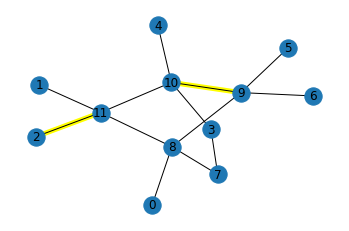

voiture : 0 pourcentage = 3.4722222222222223 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 6.944444444444445 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 3.0864197530864197 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 9.25925925925926 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 6.944444444444445 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 3.9682539682539684 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 3.0864197530864197 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 3.4722222222222223 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 2.7777777777777777 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 3.0864197530864197 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9

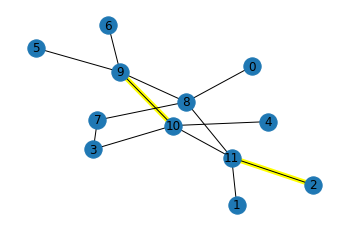

voiture : 0 pourcentage = 5.208333333333334 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 10.416666666666668 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 4.62962962962963 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 13.88888888888889 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 10.416666666666668 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 5.9523809523809526 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 4.62962962962963 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 5.208333333333334 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 4.166666666666666 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 4.62962962962963 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}


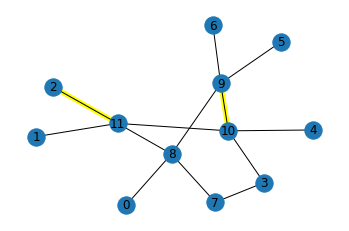

voiture : 0 pourcentage = 6.944444444444445 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 13.88888888888889 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 6.172839506172839 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 18.51851851851852 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 13.88888888888889 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 7.936507936507937 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 6.172839506172839 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 6.944444444444445 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 5.555555555555555 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 6.172839506172839 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}


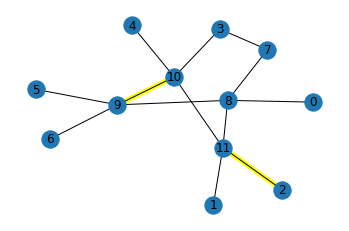

voiture : 0 pourcentage = 8.680555555555555 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 17.36111111111111 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 7.716049382716049 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 23.14814814814815 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 17.36111111111111 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 9.920634920634921 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 7.716049382716049 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 8.680555555555555 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 6.944444444444445 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 7.716049382716049 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}


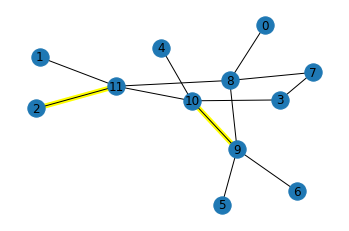

voiture : 0 pourcentage = 10.416666666666666 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 20.833333333333332 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 9.25925925925926 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 27.77777777777778 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 20.833333333333332 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 11.904761904761905 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 9.25925925925926 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 10.416666666666666 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 8.333333333333334 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 9.25925925925926 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1

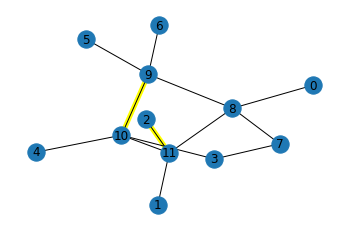

voiture : 0 pourcentage = 12.152777777777777 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 24.305555555555554 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 10.80246913580247 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 32.407407407407405 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 24.305555555555554 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 13.88888888888889 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 10.80246913580247 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 12.152777777777777 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 9.722222222222223 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 10.80246913580247 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9)

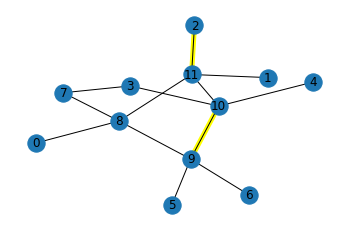

voiture : 0 pourcentage = 13.888888888888888 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 27.777777777777775 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 12.34567901234568 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 37.03703703703704 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 27.777777777777775 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 15.873015873015873 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 12.34567901234568 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 13.888888888888888 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 11.111111111111112 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 12.34567901234568 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9

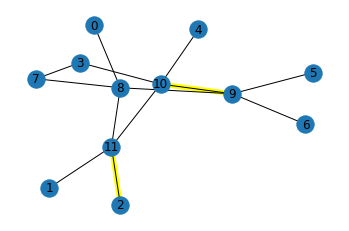

voiture : 0 pourcentage = 15.624999999999998 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 31.249999999999996 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 13.888888888888891 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 41.66666666666667 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 31.249999999999996 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 17.857142857142858 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 13.888888888888891 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 15.624999999999998 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 12.500000000000002 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 13.888888888888891 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6

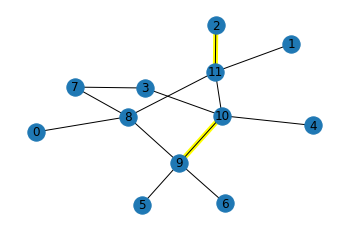

voiture : 0 pourcentage = 17.36111111111111 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 34.72222222222222 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 15.432098765432102 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 46.296296296296305 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 34.72222222222222 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 19.841269841269842 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 15.432098765432102 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 17.36111111111111 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 13.888888888888891 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 15.432098765432102 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9

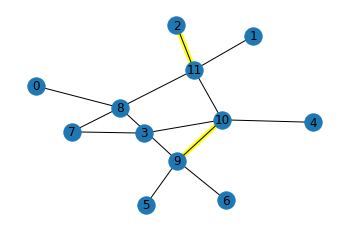

voiture : 0 pourcentage = 19.09722222222222 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 38.19444444444444 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 16.97530864197531 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 50.92592592592594 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 38.19444444444444 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 21.825396825396826 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 16.97530864197531 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 19.09722222222222 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 15.27777777777778 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 16.97530864197531 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

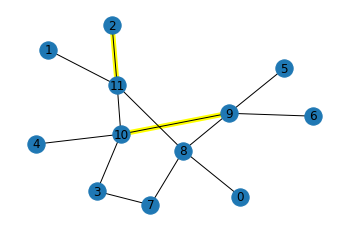

voiture : 0 pourcentage = 20.833333333333332 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 41.666666666666664 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 18.51851851851852 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 55.55555555555557 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 41.666666666666664 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 23.80952380952381 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 18.51851851851852 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 20.833333333333332 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 16.666666666666668 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 18.51851851851852 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9)

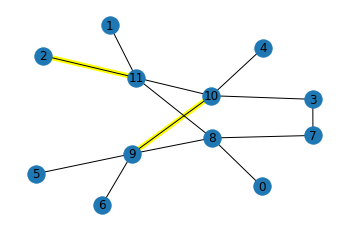

voiture : 0 pourcentage = 22.569444444444443 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 45.138888888888886 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 20.061728395061728 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 60.185185185185205 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 45.138888888888886 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 25.793650793650794 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 20.061728395061728 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 22.569444444444443 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 18.055555555555557 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 20.061728395061728 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (

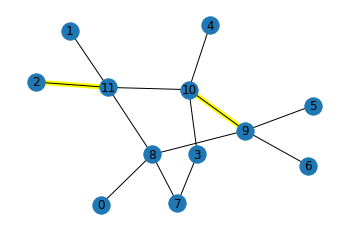

voiture : 0 pourcentage = 24.305555555555554 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 48.61111111111111 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 21.604938271604937 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 64.81481481481484 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 48.61111111111111 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 27.77777777777778 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 21.604938271604937 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 24.305555555555554 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 19.444444444444446 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 21.604938271604937 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9

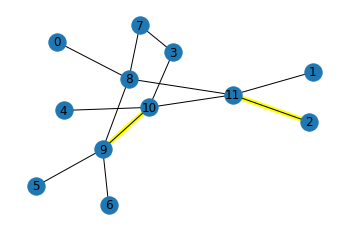

voiture : 0 pourcentage = 26.041666666666664 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 52.08333333333333 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 23.148148148148145 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 69.44444444444447 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 52.08333333333333 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 29.761904761904763 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 23.148148148148145 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 26.041666666666664 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 20.833333333333336 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 23.148148148148145 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 

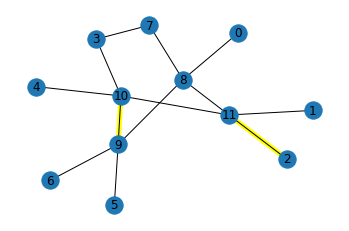

voiture : 0 pourcentage = 27.777777777777775 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 55.55555555555555 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 24.691358024691354 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 74.0740740740741 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 55.55555555555555 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 31.746031746031747 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 24.691358024691354 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 27.777777777777775 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 22.222222222222225 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 24.691358024691354 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9

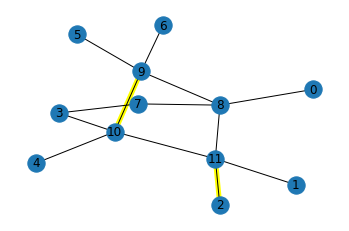

voiture : 0 pourcentage = 29.513888888888886 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 59.02777777777777 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 26.234567901234563 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 78.70370370370374 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 59.02777777777777 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 33.730158730158735 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 26.234567901234563 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 29.513888888888886 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 23.611111111111114 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 26.234567901234563 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 

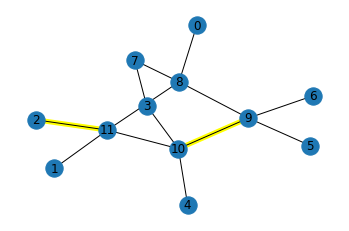

voiture : 0 pourcentage = 31.249999999999996 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 62.49999999999999 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 27.77777777777777 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 83.33333333333337 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 62.49999999999999 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 35.71428571428572 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 27.77777777777777 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 31.249999999999996 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 25.000000000000004 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 27.77777777777777 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 

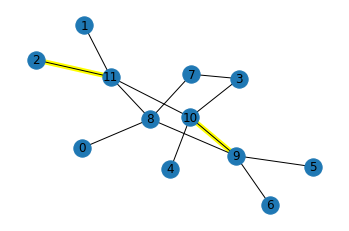

voiture : 0 pourcentage = 32.98611111111111 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 65.97222222222221 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 29.32098765432098 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 87.962962962963 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 65.97222222222221 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 37.69841269841271 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 29.32098765432098 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 32.98611111111111 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 26.388888888888893 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 29.32098765432098 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}



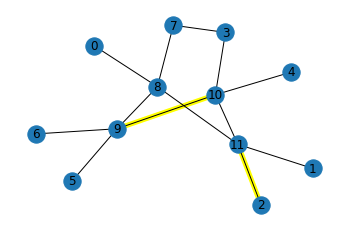

voiture : 0 pourcentage = 34.72222222222222 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 69.44444444444444 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 30.86419753086419 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 92.59259259259264 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 69.44444444444444 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 39.6825396825397 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 30.86419753086419 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 34.72222222222222 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 27.777777777777782 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 30.86419753086419 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}


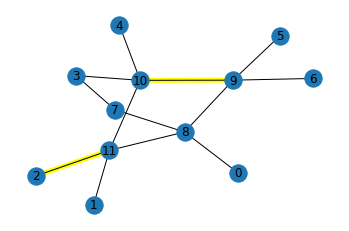

voiture : 0 pourcentage = 36.458333333333336 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 72.91666666666667 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 32.4074074074074 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 97.22222222222227 tuple pos = (3, 10) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 72.91666666666667 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 41.666666666666686 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 32.4074074074074 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 36.458333333333336 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 29.16666666666667 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 32.4074074074074 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 2, (2, 11): 2, (10, 4): 1, (3, 10): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}


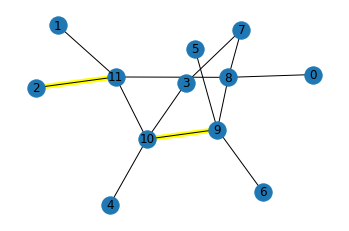

voiture : 0 pourcentage = 38.19444444444445 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 76.3888888888889 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 33.950617283950606 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 1.7361111111111112 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 76.3888888888889 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 43.65079365079367 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 33.950617283950606 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 38.19444444444445 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 30.55555555555556 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 33.950617283950606 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route 

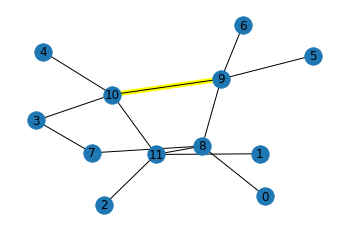

voiture : 0 pourcentage = 39.930555555555564 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 79.86111111111113 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 35.493827160493815 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 3.4722222222222223 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 79.86111111111113 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 45.63492063492066 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 35.493827160493815 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 39.930555555555564 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 31.94444444444445 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 35.493827160493815 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la ro

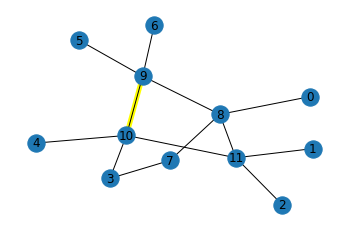

voiture : 0 pourcentage = 41.66666666666668 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 83.33333333333336 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 37.037037037037024 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 5.208333333333334 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 83.33333333333336 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 47.61904761904765 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 37.037037037037024 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 41.66666666666668 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 33.333333333333336 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 37.037037037037024 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la rout

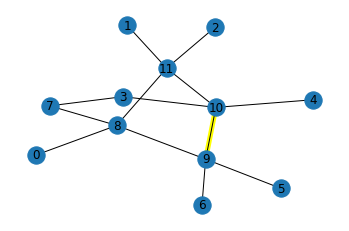

voiture : 0 pourcentage = 43.40277777777779 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 86.80555555555559 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 38.58024691358023 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 6.944444444444445 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 86.80555555555559 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 49.60317460317464 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 38.58024691358023 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 43.40277777777779 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 34.72222222222222 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 38.58024691358023 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la

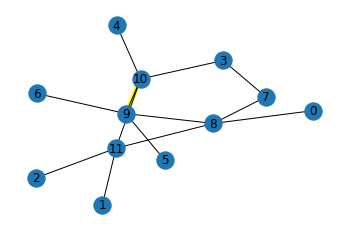

voiture : 0 pourcentage = 45.13888888888891 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 90.27777777777781 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 40.12345679012344 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 8.680555555555555 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 90.27777777777781 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 51.587301587301624 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 40.12345679012344 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 45.13888888888891 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 36.11111111111111 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 40.12345679012344 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route l

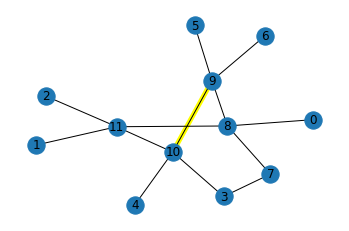

voiture : 0 pourcentage = 46.87500000000002 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 93.75000000000004 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 41.66666666666665 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 10.416666666666666 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 93.75000000000004 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 53.57142857142861 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 41.66666666666665 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 46.87500000000002 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 37.49999999999999 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 41.66666666666665 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route l

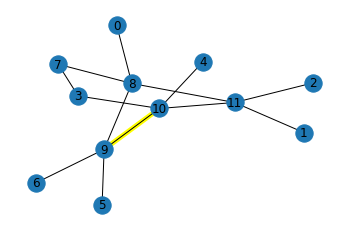

voiture : 0 pourcentage = 48.611111111111136 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 97.22222222222227 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 43.20987654320986 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 12.152777777777777 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 97.22222222222227 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 55.5555555555556 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 43.20987654320986 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 48.611111111111136 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 38.88888888888888 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 43.20987654320986 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route 

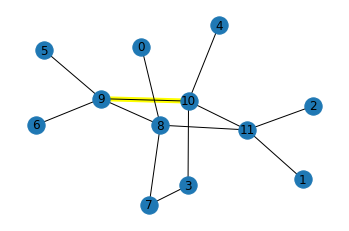

voiture : 0 pourcentage = 50.34722222222225 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 44.75308641975307 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 13.888888888888888 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 57.53968253968259 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 44.75308641975307 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 50.34722222222225 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 40.277777777777764 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 44.75308641975307 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9

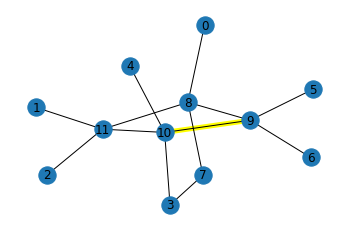

voiture : 0 pourcentage = 52.083333333333364 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 46.296296296296276 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 15.624999999999998 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 59.523809523809575 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 46.296296296296276 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 52.083333333333364 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 41.66666666666665 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 46.296296296296276 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est 

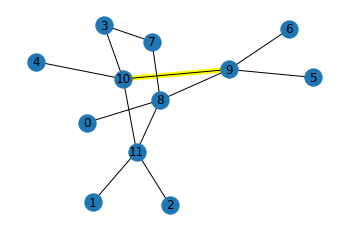

voiture : 0 pourcentage = 53.81944444444448 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 47.839506172839485 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 17.36111111111111 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 61.50793650793656 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 47.839506172839485 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 53.81944444444448 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 43.055555555555536 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 47.839506172839485 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [

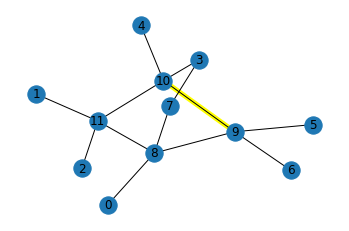

voiture : 0 pourcentage = 55.55555555555559 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 49.382716049382694 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 19.09722222222222 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 63.49206349206355 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 49.382716049382694 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 55.55555555555559 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 44.44444444444442 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 49.382716049382694 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(

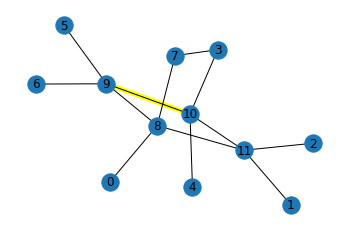

voiture : 0 pourcentage = 57.29166666666671 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 50.9259259259259 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 20.833333333333332 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 65.47619047619054 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 50.9259259259259 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 57.29166666666671 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 45.83333333333331 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 50.9259259259259 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 10

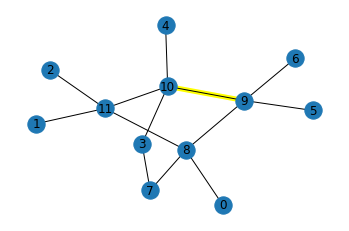

voiture : 0 pourcentage = 59.02777777777782 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 52.46913580246911 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 22.569444444444443 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 67.46031746031753 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 52.46913580246911 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 59.02777777777782 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 47.22222222222219 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 52.46913580246911 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

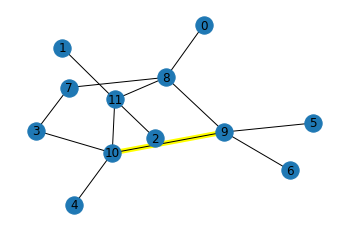

voiture : 0 pourcentage = 60.763888888888935 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 54.01234567901232 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 24.305555555555554 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 69.44444444444451 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 54.01234567901232 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 60.763888888888935 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 48.61111111111108 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 54.01234567901232 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(

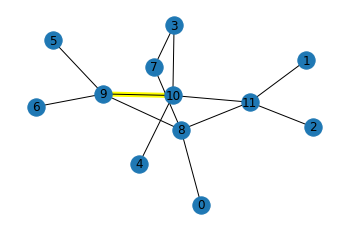

voiture : 0 pourcentage = 62.50000000000005 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 55.55555555555553 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 26.041666666666664 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 71.4285714285715 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 55.55555555555553 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 62.50000000000005 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 49.999999999999964 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 55.55555555555553 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

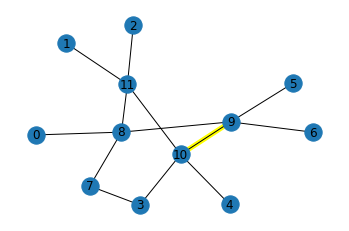

voiture : 0 pourcentage = 64.23611111111116 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 57.09876543209874 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 27.777777777777775 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 73.41269841269849 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 57.09876543209874 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 64.23611111111116 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 51.38888888888885 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 57.09876543209874 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

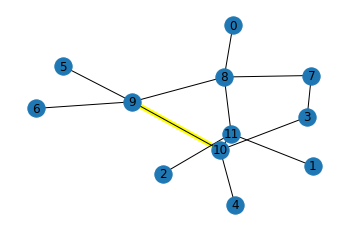

voiture : 0 pourcentage = 65.97222222222227 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 58.641975308641946 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 29.513888888888886 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 75.39682539682548 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 58.641975308641946 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 65.97222222222227 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 52.777777777777736 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 58.641975308641946 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : 

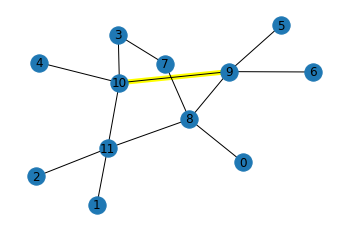

voiture : 0 pourcentage = 67.70833333333339 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 60.185185185185155 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 31.249999999999996 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 77.38095238095246 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 60.185185185185155 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 67.70833333333339 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 54.16666666666662 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 60.185185185185155 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [

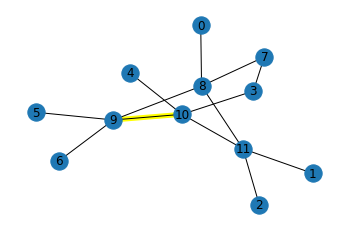

voiture : 0 pourcentage = 69.4444444444445 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 61.728395061728364 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 32.98611111111111 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 79.36507936507945 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 61.728395061728364 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 69.4444444444445 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 55.55555555555551 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 61.728395061728364 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

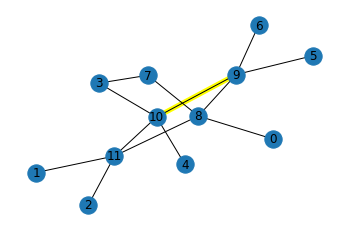

voiture : 0 pourcentage = 71.18055555555561 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 63.27160493827157 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 34.72222222222222 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 81.34920634920644 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 63.27160493827157 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 71.18055555555561 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 56.94444444444439 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 63.27160493827157 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 

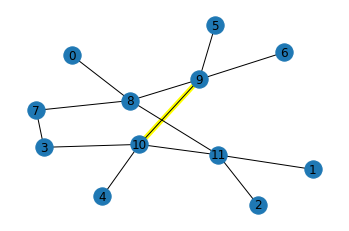

voiture : 0 pourcentage = 72.91666666666673 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 64.81481481481478 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 36.458333333333336 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 83.33333333333343 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 64.81481481481478 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 72.91666666666673 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 58.33333333333328 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 64.81481481481478 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

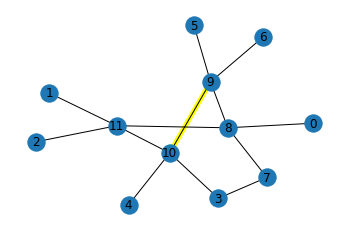

voiture : 0 pourcentage = 74.65277777777784 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 66.358024691358 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 38.19444444444445 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 85.31746031746042 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 66.358024691358 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 74.65277777777784 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 59.722222222222165 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 66.358024691358 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 10)] 

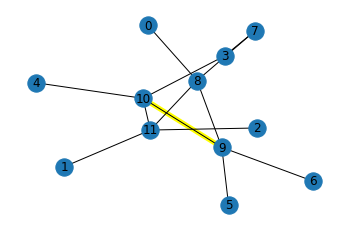

voiture : 0 pourcentage = 76.38888888888896 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 67.90123456790121 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 39.930555555555564 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 87.3015873015874 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 67.90123456790121 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 76.38888888888896 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 61.11111111111105 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 67.90123456790121 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 

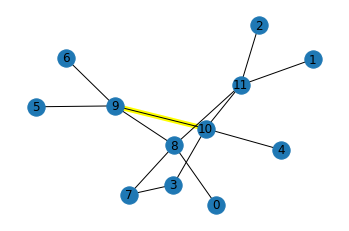

voiture : 0 pourcentage = 78.12500000000007 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 69.44444444444443 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 41.66666666666668 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 89.28571428571439 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 69.44444444444443 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 78.12500000000007 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 62.499999999999936 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 69.44444444444443 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

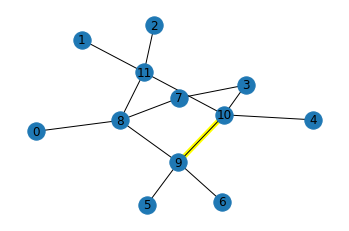

voiture : 0 pourcentage = 79.86111111111119 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 70.98765432098764 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 43.40277777777779 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 91.26984126984138 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 70.98765432098764 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 79.86111111111119 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 63.88888888888882 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 70.98765432098764 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 

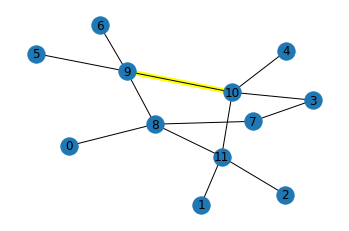

voiture : 0 pourcentage = 81.5972222222223 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 72.53086419753086 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 45.13888888888891 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 93.25396825396837 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 72.53086419753086 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 81.5972222222223 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 65.27777777777771 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 72.53086419753086 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 10

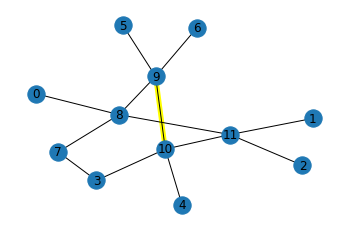

voiture : 0 pourcentage = 83.33333333333341 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 74.07407407407408 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 46.87500000000002 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 95.23809523809535 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 74.07407407407408 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 83.33333333333341 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 66.6666666666666 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 74.07407407407408 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 1

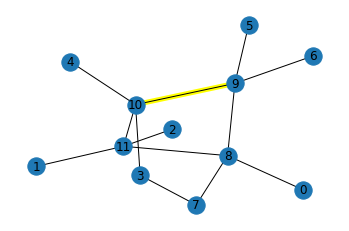

voiture : 0 pourcentage = 85.06944444444453 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 75.61728395061729 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 48.611111111111136 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 97.22222222222234 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 75.61728395061729 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 85.06944444444453 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 68.05555555555549 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 75.61728395061729 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

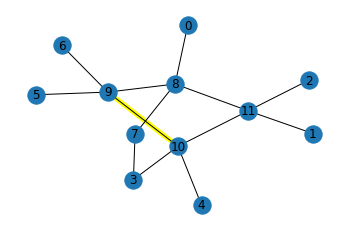

voiture : 0 pourcentage = 86.80555555555564 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 77.16049382716051 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 50.34722222222225 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 99.20634920634933 tuple pos = (8, 7) chemin est [8, 7, 3]
voiture : 6 pourcentage = 77.16049382716051 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 86.80555555555564 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 69.44444444444437 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 77.16049382716051 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (8, 7): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 

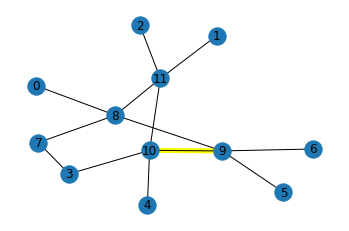

voiture : 0 pourcentage = 88.54166666666676 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 78.70370370370372 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 52.083333333333364 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 3.4722222222222223 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 78.70370370370372 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 88.54166666666676 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 70.83333333333326 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 78.70370370370372 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9

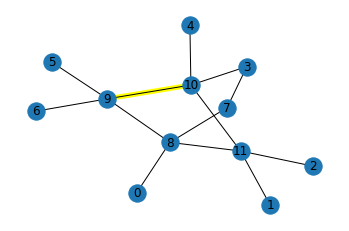

voiture : 0 pourcentage = 90.27777777777787 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 80.24691358024694 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 53.81944444444448 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 6.944444444444445 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 80.24691358024694 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 90.27777777777787 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 72.22222222222214 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 80.24691358024694 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 

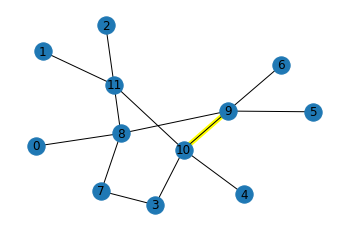

voiture : 0 pourcentage = 92.01388888888899 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 81.79012345679016 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 55.55555555555559 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 10.416666666666668 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 81.79012345679016 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 92.01388888888899 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 73.61111111111103 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 81.79012345679016 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

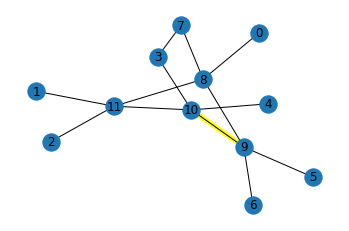

voiture : 0 pourcentage = 93.7500000000001 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 83.33333333333337 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 57.29166666666671 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 13.88888888888889 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 83.33333333333337 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 93.7500000000001 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 74.99999999999991 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 83.33333333333337 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 10

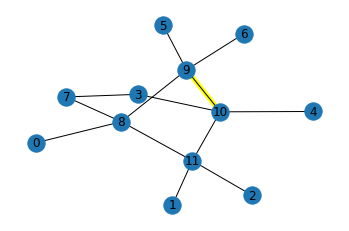

voiture : 0 pourcentage = 95.48611111111121 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 84.87654320987659 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 59.02777777777782 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 17.36111111111111 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 84.87654320987659 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 95.48611111111121 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 76.3888888888888 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 84.87654320987659 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 1

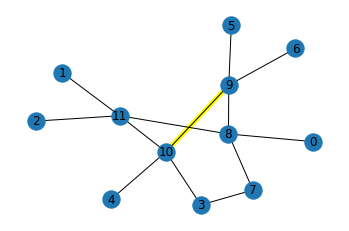

voiture : 0 pourcentage = 97.22222222222233 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 86.4197530864198 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 60.763888888888935 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 20.833333333333332 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 86.4197530864198 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 97.22222222222233 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 77.77777777777769 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 86.4197530864198 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9, 1

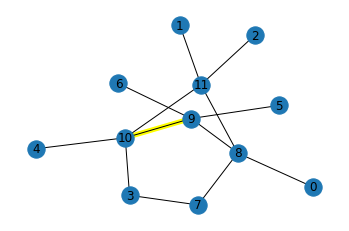

voiture : 0 pourcentage = 98.95833333333344 tuple pos = (9, 10) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 87.96296296296302 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 62.50000000000005 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 24.305555555555554 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 87.96296296296302 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 98.95833333333344 tuple pos = (10, 9) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 79.16666666666657 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 87.96296296296302 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(9, 10): 3, (2, 11): 2, (10, 4): 1, (7, 3): 1, (1, 11): 1, (11, 10): 1, (6, 9): 1}

la route la plus empreintée est : [(9,

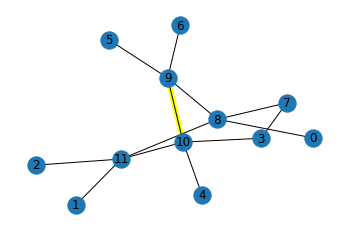

voiture : 0 pourcentage = 4.62962962962963 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 89.50617283950623 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 64.23611111111116 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 27.777777777777775 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 89.50617283950623 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 6.944444444444445 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 80.55555555555546 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 89.50617283950623 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plus 

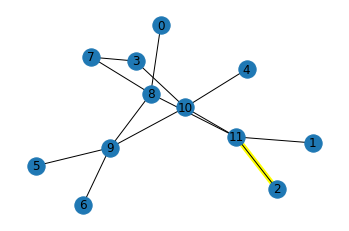

voiture : 0 pourcentage = 9.25925925925926 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 91.04938271604945 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 65.97222222222227 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 31.249999999999996 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 91.04938271604945 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 13.88888888888889 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 81.94444444444434 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 91.04938271604945 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plus 

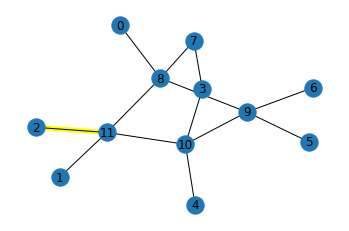

voiture : 0 pourcentage = 13.88888888888889 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 92.59259259259267 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 67.70833333333339 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 34.72222222222222 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 92.59259259259267 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 20.833333333333336 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 83.33333333333323 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 92.59259259259267 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plus

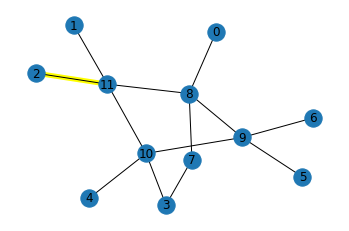

voiture : 0 pourcentage = 18.51851851851852 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 94.13580246913588 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 69.4444444444445 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 38.19444444444444 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 94.13580246913588 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 27.77777777777778 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 84.72222222222211 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 94.13580246913588 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plus e

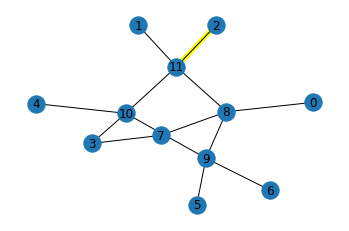

voiture : 0 pourcentage = 23.14814814814815 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 95.6790123456791 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 71.18055555555561 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 41.666666666666664 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 95.6790123456791 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 34.72222222222222 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 86.111111111111 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 95.6790123456791 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plus empr

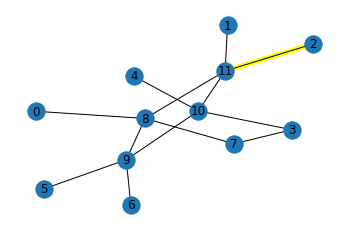

voiture : 0 pourcentage = 27.77777777777778 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 97.22222222222231 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 72.91666666666673 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 45.138888888888886 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 97.22222222222231 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 41.666666666666664 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 87.49999999999989 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 97.22222222222231 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plu

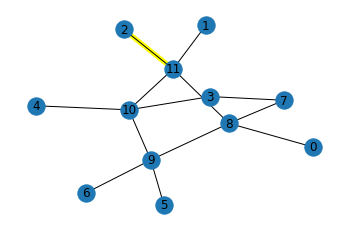

voiture : 0 pourcentage = 32.407407407407405 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 98.76543209876553 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 74.65277777777784 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 48.61111111111111 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 98.76543209876553 tuple pos = (1, 11) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 48.61111111111111 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 88.88888888888877 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 98.76543209876553 tuple pos = (6, 9) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 1, (7, 3): 1, (1, 11): 1, (9, 8): 1, (11, 10): 1, (6, 9): 1}

la route la plus

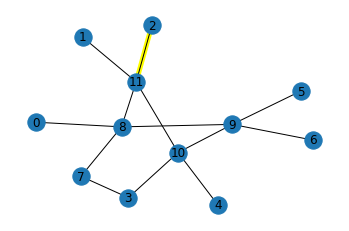

voiture : 0 pourcentage = 37.03703703703704 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 76.38888888888896 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 52.08333333333333 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 1.3888888888888888 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 55.55555555555555 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 90.27777777777766 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 1.7361111111111112 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9

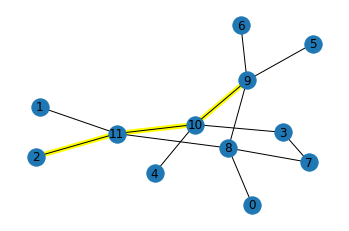

voiture : 0 pourcentage = 41.66666666666667 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 78.12500000000007 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 55.55555555555555 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 2.7777777777777777 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 62.49999999999999 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 91.66666666666654 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 3.4722222222222223 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9

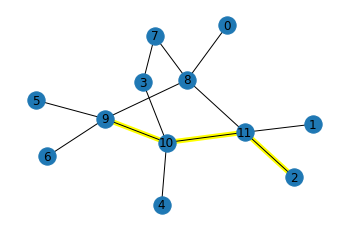

voiture : 0 pourcentage = 46.296296296296305 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 79.86111111111119 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 59.02777777777777 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 4.166666666666666 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 69.44444444444444 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 93.05555555555543 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 5.208333333333334 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9)

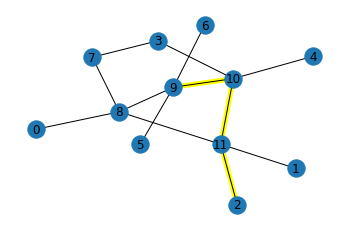

voiture : 0 pourcentage = 50.92592592592594 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 81.5972222222223 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 62.49999999999999 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 5.555555555555555 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 76.38888888888889 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 94.44444444444431 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 6.944444444444445 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9), 

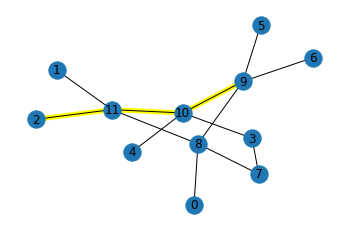

voiture : 0 pourcentage = 55.55555555555557 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 83.33333333333341 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 65.97222222222221 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 6.944444444444445 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 83.33333333333333 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 95.8333333333332 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 8.680555555555555 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9), 

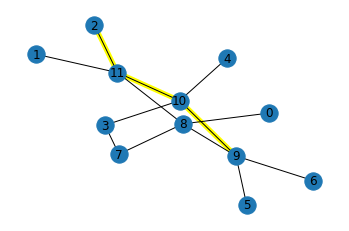

voiture : 0 pourcentage = 60.185185185185205 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 85.06944444444453 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 69.44444444444444 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 8.333333333333334 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 90.27777777777777 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 97.22222222222209 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 10.416666666666666 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9

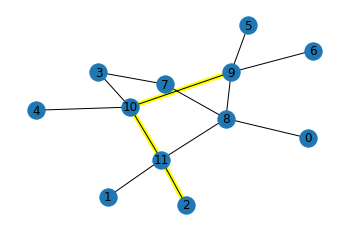

voiture : 0 pourcentage = 64.81481481481484 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 86.80555555555564 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 72.91666666666667 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 9.722222222222223 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 97.22222222222221 tuple pos = (9, 8) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 98.61111111111097 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 12.152777777777777 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (9, 8): 1}

la route la plus empreintée est : [(2, 11), (10, 9)

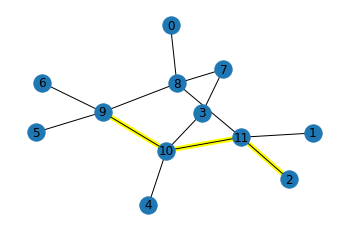

voiture : 0 pourcentage = 69.44444444444447 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 88.54166666666676 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 76.3888888888889 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 11.111111111111112 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 4.62962962962963 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 99.99999999999986 tuple pos = (11, 10) chemin est [11, 10, 3]
voiture : 9 pourcentage = 13.888888888888888 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 1, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 2, (8, 0): 1}

la route la plus empreintée est : [(2, 11), (10, 9),

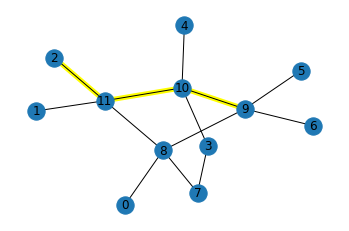

voiture : 0 pourcentage = 74.0740740740741 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 90.27777777777787 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 79.86111111111113 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 12.500000000000002 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 9.25925925925926 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 4.62962962962963 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 15.624999999999998 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (

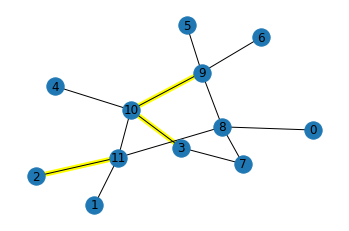

voiture : 0 pourcentage = 78.70370370370374 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 92.01388888888899 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 83.33333333333336 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 13.888888888888891 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 13.88888888888889 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 9.25925925925926 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 17.36111111111111 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), 

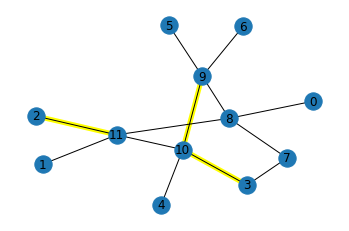

voiture : 0 pourcentage = 83.33333333333337 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 93.7500000000001 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 86.80555555555559 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 15.27777777777778 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 18.51851851851852 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 13.88888888888889 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 19.09722222222222 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (

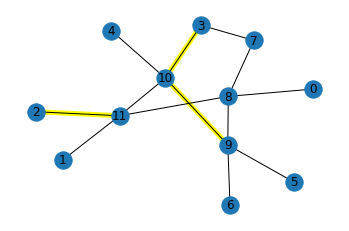

voiture : 0 pourcentage = 87.962962962963 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 95.48611111111121 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 90.27777777777781 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 16.666666666666668 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 23.14814814814815 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 18.51851851851852 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 20.833333333333332 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), 

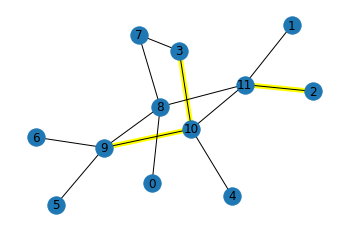

voiture : 0 pourcentage = 92.59259259259264 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 97.22222222222233 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 93.75000000000004 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 18.055555555555557 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 27.77777777777778 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 23.14814814814815 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 22.569444444444443 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11)

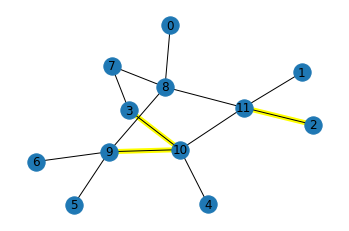

voiture : 0 pourcentage = 97.22222222222227 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 98.95833333333344 tuple pos = (10, 9) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 97.22222222222227 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 19.444444444444446 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 32.407407407407405 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 27.77777777777778 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 24.305555555555554 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (10, 9): 2, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11

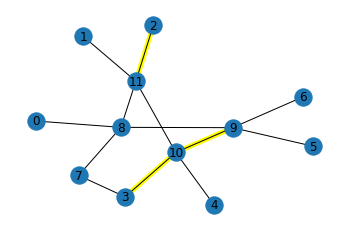

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 4.62962962962963 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 20.833333333333336 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 37.03703703703704 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 32.407407407407405 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 26.041666666666664 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voiture

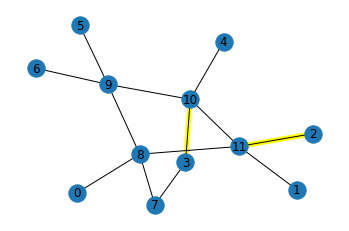

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 9.25925925925926 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 22.222222222222225 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 41.66666666666667 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 37.03703703703704 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 27.777777777777775 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures

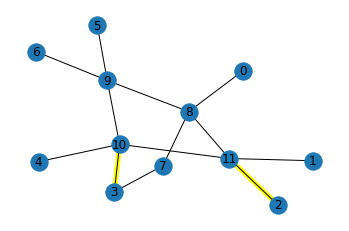

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 13.88888888888889 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 23.611111111111114 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 46.296296296296305 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 41.66666666666667 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 29.513888888888886 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitur

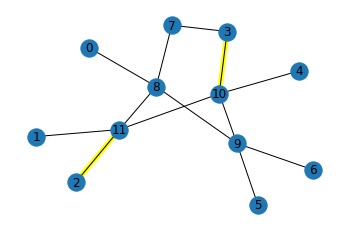

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 18.51851851851852 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 25.000000000000004 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 50.92592592592594 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 46.296296296296305 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 31.249999999999996 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitur

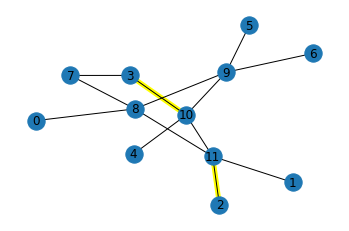

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 23.14814814814815 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 26.388888888888893 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 55.55555555555557 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 50.92592592592594 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 32.98611111111111 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures

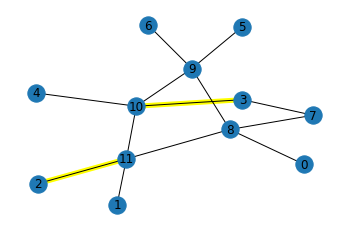

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 27.77777777777778 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 27.777777777777782 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 60.185185185185205 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 55.55555555555557 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 34.72222222222222 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voiture

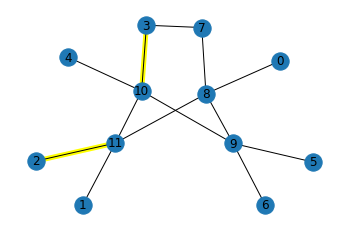

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 32.407407407407405 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 29.16666666666667 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 64.81481481481484 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 60.185185185185205 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 36.458333333333336 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitur

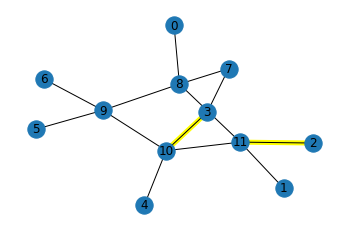

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 37.03703703703704 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 30.55555555555556 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 69.44444444444447 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 64.81481481481484 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 38.19444444444445 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


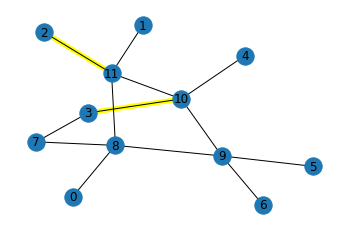

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 41.66666666666667 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 31.94444444444445 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 74.0740740740741 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 69.44444444444447 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 39.930555555555564 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


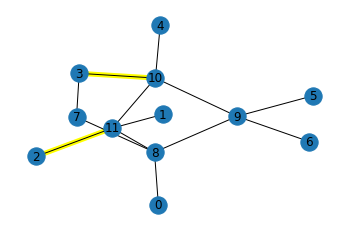

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 46.296296296296305 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 33.333333333333336 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 78.70370370370374 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 74.0740740740741 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 41.66666666666668 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures

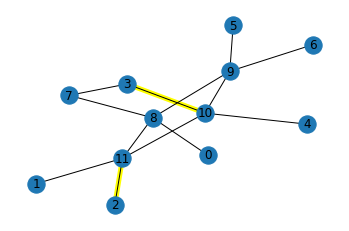

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 50.92592592592594 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 34.72222222222222 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 83.33333333333337 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 78.70370370370374 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 43.40277777777779 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


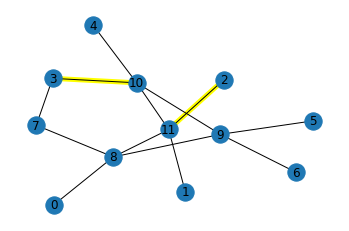

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 55.55555555555557 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 36.11111111111111 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 87.962962962963 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 83.33333333333337 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 45.13888888888891 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


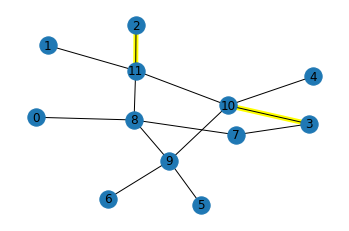

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 60.185185185185205 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 37.49999999999999 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 92.59259259259264 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 87.962962962963 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 46.87500000000002 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


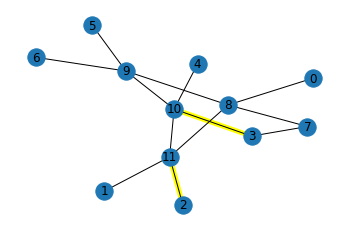

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 64.81481481481484 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 38.88888888888888 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 97.22222222222227 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 92.59259259259264 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 48.611111111111136 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures

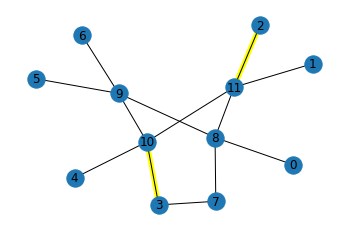

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 69.44444444444447 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 40.277777777777764 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 97.22222222222227 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 50.34722222222225 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


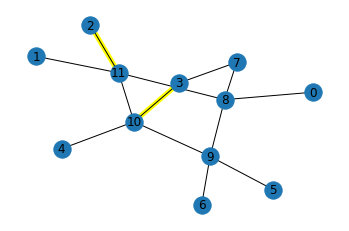

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 74.0740740740741 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 41.66666666666665 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 52.083333333333364 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


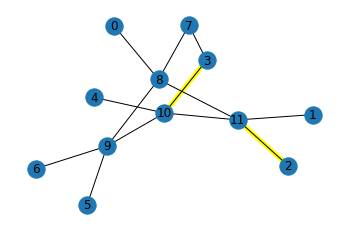

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 78.70370370370374 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 43.055555555555536 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 53.81944444444448 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


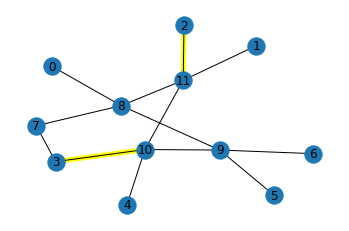

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 83.33333333333337 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 44.44444444444442 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 55.55555555555559 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


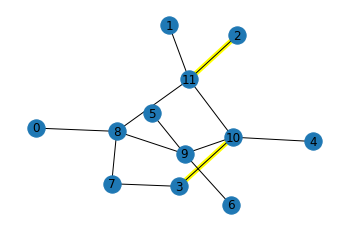

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 87.962962962963 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 45.83333333333331 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 57.29166666666671 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


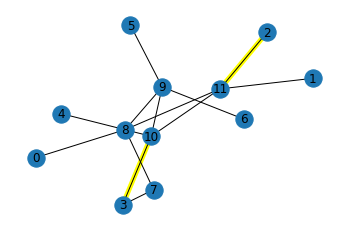

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 92.59259259259264 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 47.22222222222219 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 59.02777777777782 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


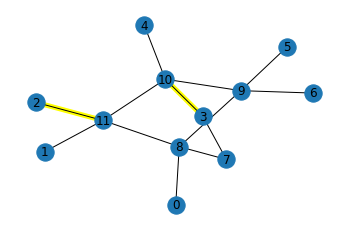

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 97.22222222222227 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 48.61111111111108 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 60.763888888888935 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


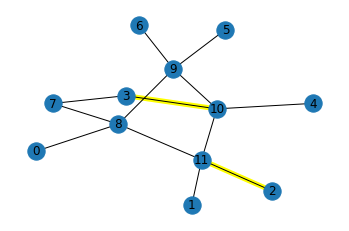

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 49.999999999999964 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 62.50000000000005 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


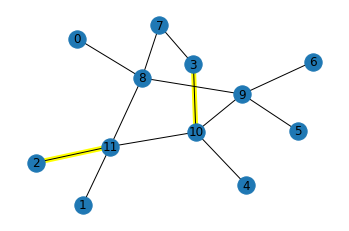

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 51.38888888888885 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 64.23611111111116 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


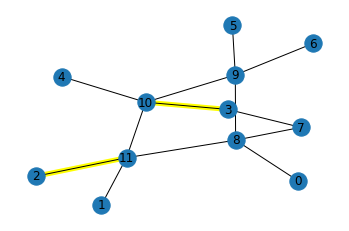

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 52.777777777777736 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 65.97222222222227 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


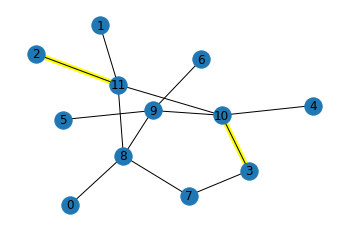

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 54.16666666666662 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 67.70833333333339 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


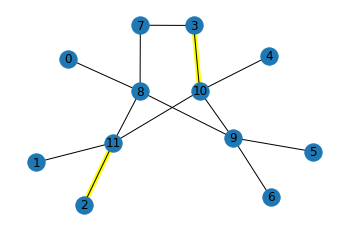

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 55.55555555555551 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 69.4444444444445 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


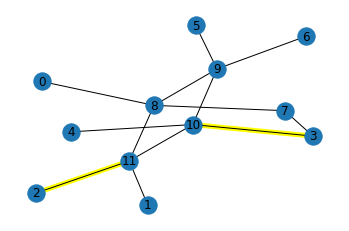

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 56.94444444444439 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 71.18055555555561 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


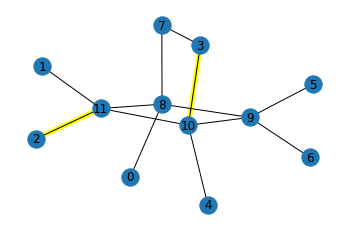

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 58.33333333333328 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 72.91666666666673 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


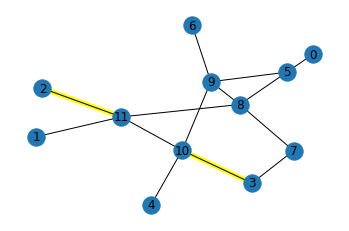

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 59.722222222222165 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 74.65277777777784 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


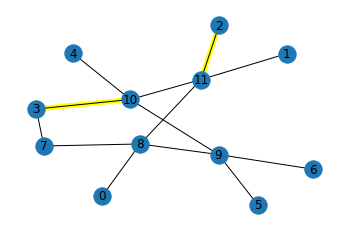

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 61.11111111111105 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 76.38888888888896 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


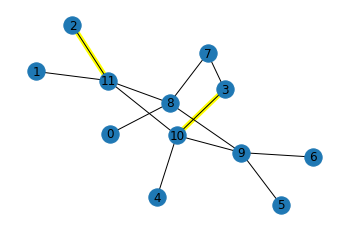

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 62.499999999999936 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 78.12500000000007 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


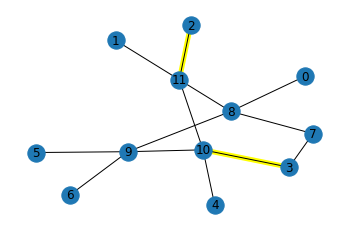

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 63.88888888888882 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 79.86111111111119 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


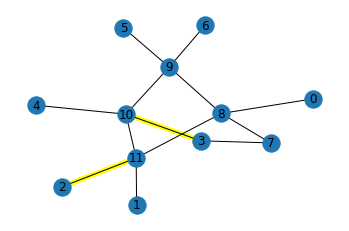

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 65.27777777777771 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 81.5972222222223 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


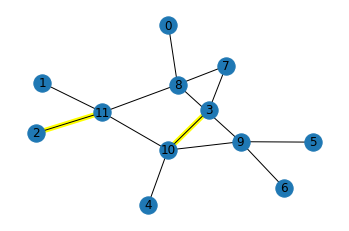

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 66.6666666666666 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 83.33333333333341 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


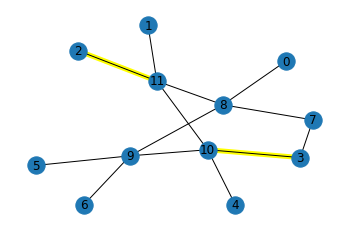

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 68.05555555555549 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 85.06944444444453 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


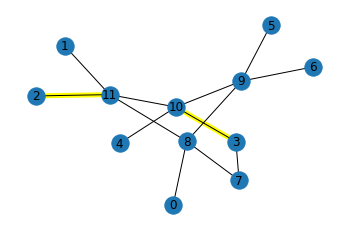

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 69.44444444444437 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 86.80555555555564 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


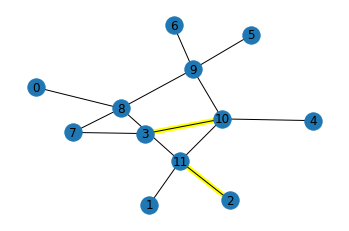

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 70.83333333333326 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 88.54166666666676 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


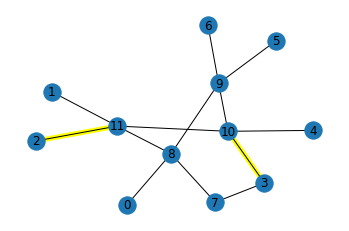

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 72.22222222222214 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 90.27777777777787 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


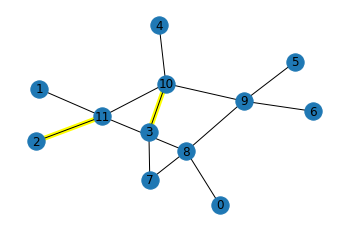

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 73.61111111111103 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 92.01388888888899 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


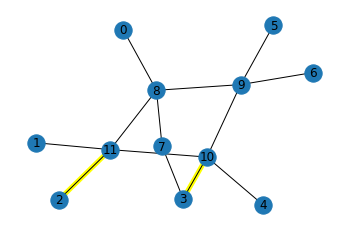

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 74.99999999999991 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 93.7500000000001 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


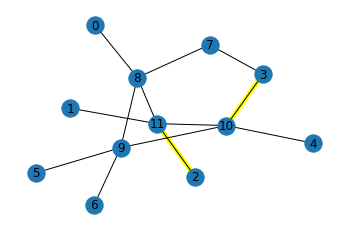

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 76.3888888888888 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 95.48611111111121 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


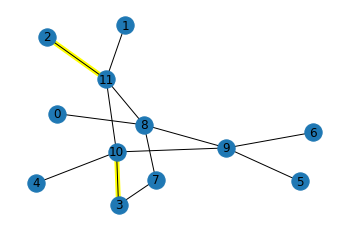

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 77.77777777777769 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 97.22222222222233 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


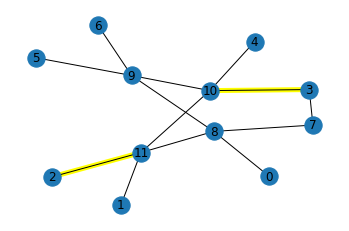

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 79.16666666666657 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 98.95833333333344 tuple pos = (9, 10) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 1, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1, (9, 10): 1}

la route la plus empreintée est : [(10, 3), (2, 11)] avec : 2 voitures


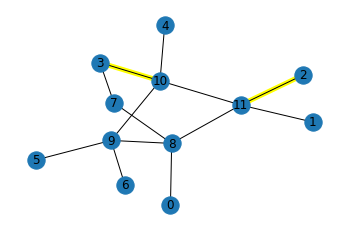

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 80.55555555555546 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 1.5432098765432098 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


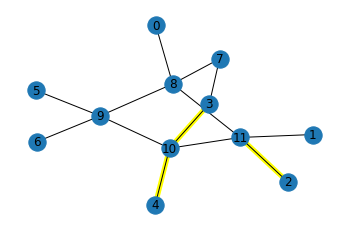

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 81.94444444444434 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 3.0864197530864197 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


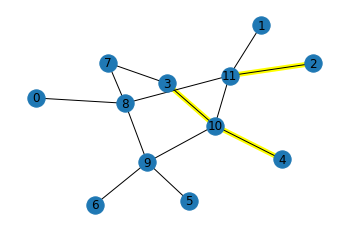

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 83.33333333333323 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 4.62962962962963 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


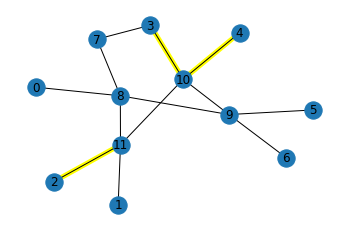

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 84.72222222222211 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 6.172839506172839 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


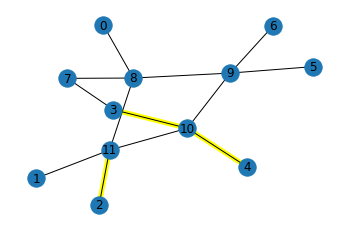

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 86.111111111111 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 7.716049382716049 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


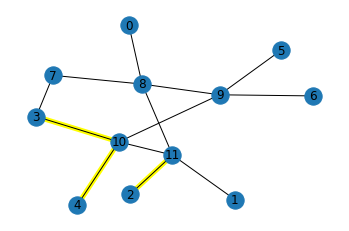

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 87.49999999999989 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 9.25925925925926 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


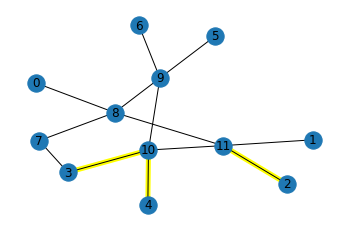

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 88.88888888888877 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 10.80246913580247 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


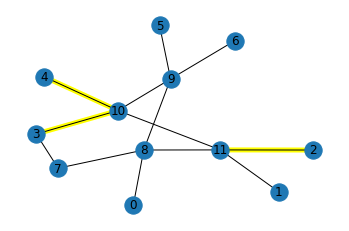

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 90.27777777777766 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 12.34567901234568 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


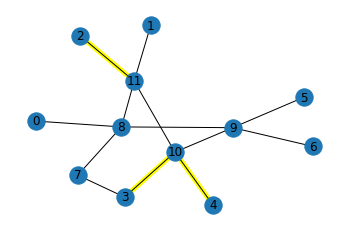

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 91.66666666666654 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 13.888888888888891 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


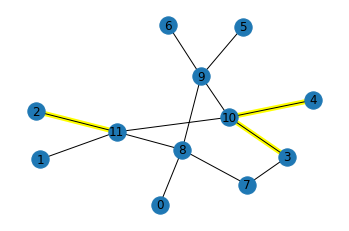

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 93.05555555555543 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 15.432098765432102 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


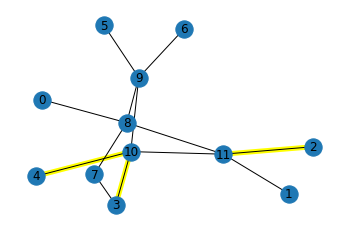

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 94.44444444444431 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 16.97530864197531 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


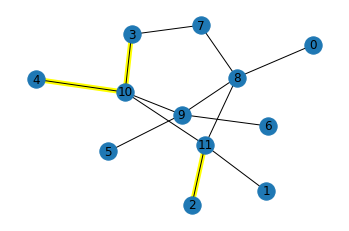

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 95.8333333333332 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 18.51851851851852 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


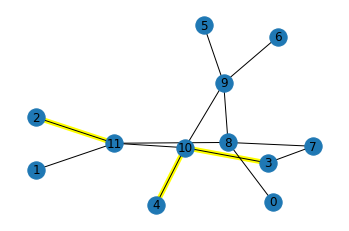

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 97.22222222222209 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 20.061728395061728 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


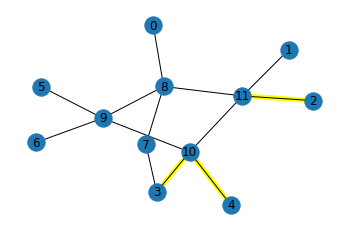

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 98.61111111111097 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 21.604938271604937 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


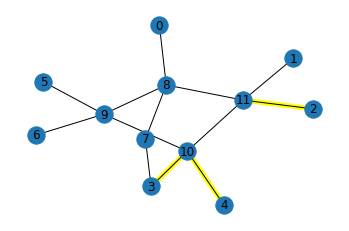

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 99.99999999999986 tuple pos = (11, 10) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 23.148148148148145 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 2, (9, 5): 1, (7, 3): 1, (11, 10): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 3), (2, 11), (10, 4)] avec : 2 voitures


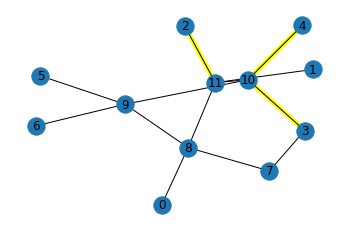

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 1.5432098765432098 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 24.691358024691354 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


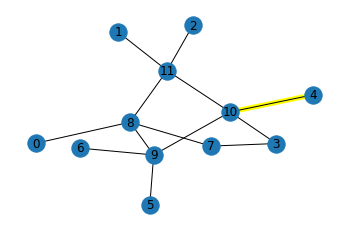

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 3.0864197530864197 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 26.234567901234563 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


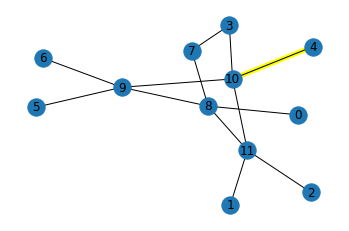

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 4.62962962962963 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 27.77777777777777 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


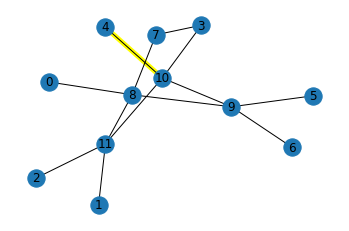

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 6.172839506172839 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 29.32098765432098 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


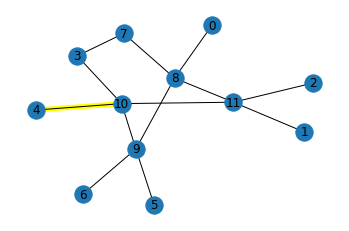

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 7.716049382716049 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 30.86419753086419 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


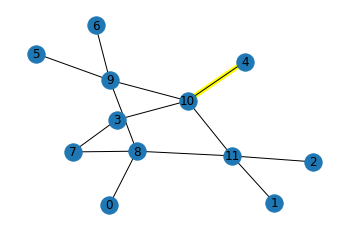

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 9.25925925925926 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 32.4074074074074 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


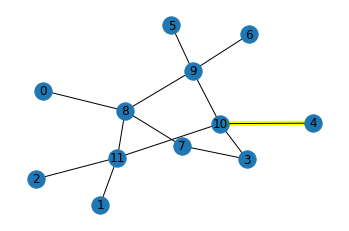

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 10.80246913580247 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 33.950617283950606 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


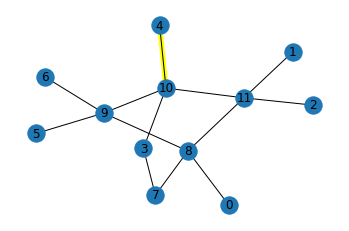

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 12.34567901234568 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 35.493827160493815 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


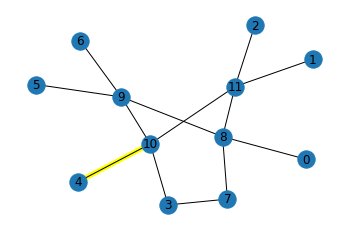

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 13.888888888888891 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 37.037037037037024 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


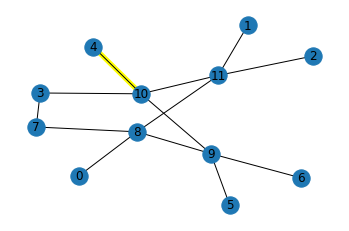

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 15.432098765432102 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 38.58024691358023 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


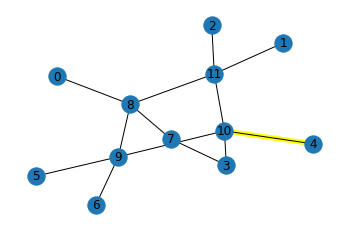

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 16.97530864197531 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 40.12345679012344 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


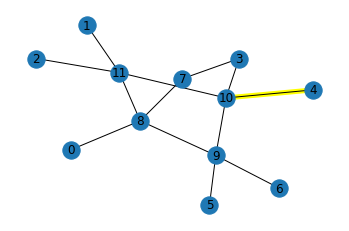

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 18.51851851851852 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 41.66666666666665 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


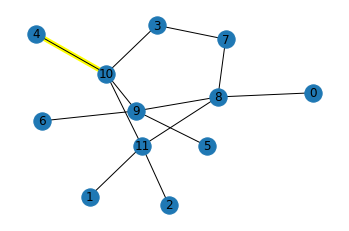

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 20.061728395061728 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 43.20987654320986 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


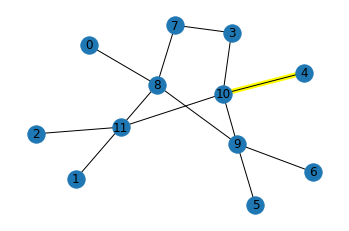

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 21.604938271604937 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 44.75308641975307 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


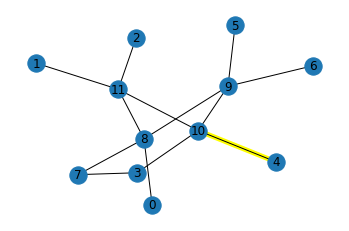

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 23.148148148148145 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 46.296296296296276 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


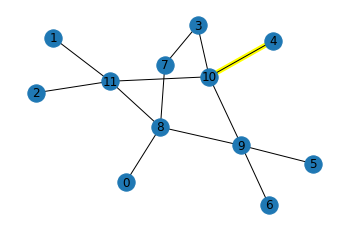

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 24.691358024691354 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 47.839506172839485 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


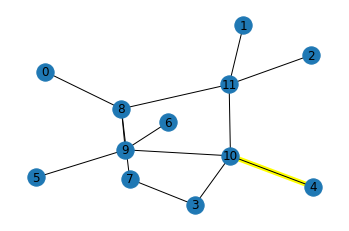

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 26.234567901234563 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 49.382716049382694 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


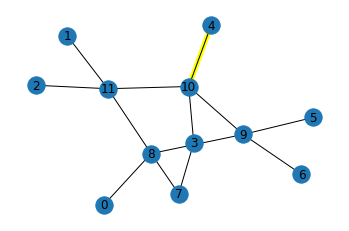

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 27.77777777777777 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 50.9259259259259 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


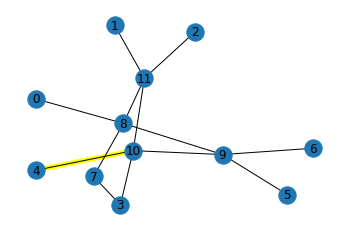

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 29.32098765432098 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 52.46913580246911 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


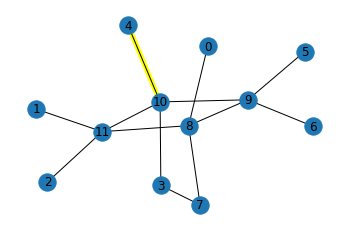

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 30.86419753086419 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 54.01234567901232 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


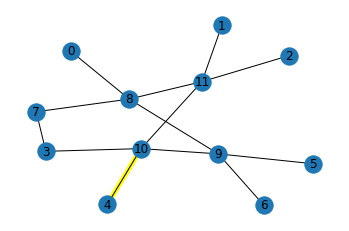

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 32.4074074074074 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 55.55555555555553 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


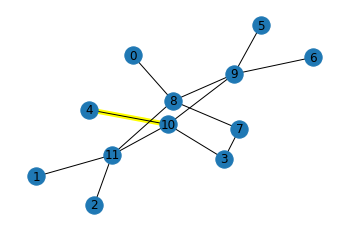

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 33.950617283950606 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 57.09876543209874 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


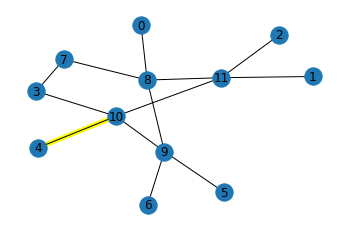

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 35.493827160493815 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 58.641975308641946 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


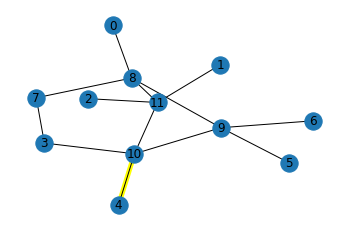

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 37.037037037037024 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 60.185185185185155 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


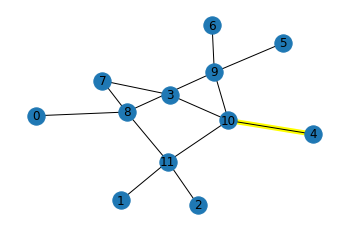

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 38.58024691358023 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 61.728395061728364 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


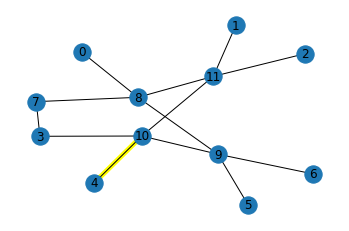

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 40.12345679012344 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 63.27160493827157 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


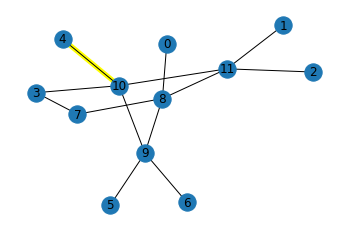

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 41.66666666666665 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 64.81481481481478 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


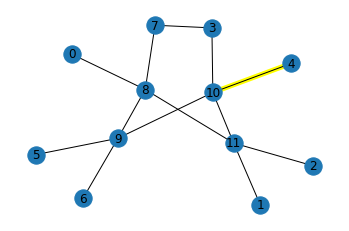

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 43.20987654320986 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 66.358024691358 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


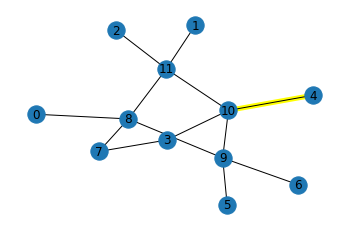

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 44.75308641975307 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 67.90123456790121 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


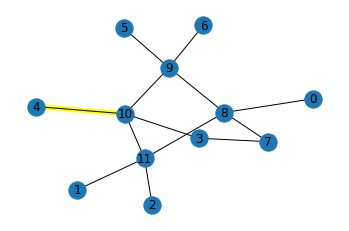

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 46.296296296296276 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 69.44444444444443 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


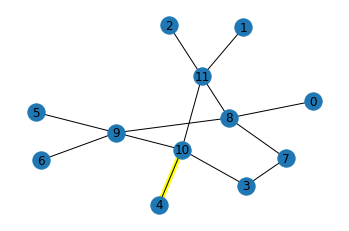

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 47.839506172839485 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 70.98765432098764 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


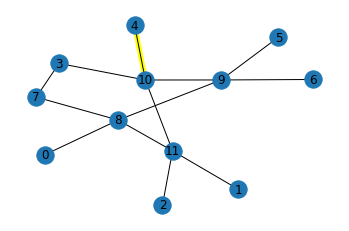

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 49.382716049382694 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 72.53086419753086 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


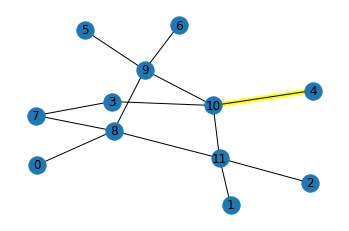

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 50.9259259259259 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 74.07407407407408 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


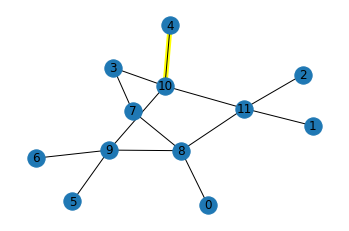

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 52.46913580246911 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 75.61728395061729 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


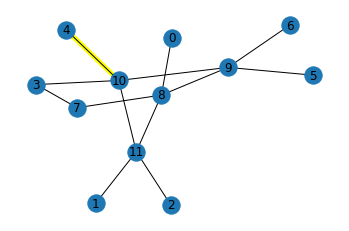

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 54.01234567901232 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 77.16049382716051 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


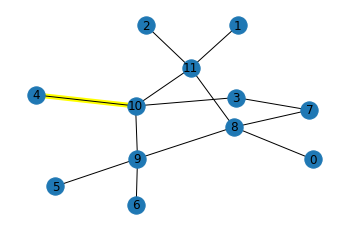

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 55.55555555555553 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 78.70370370370372 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


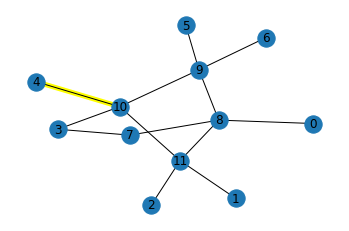

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 57.09876543209874 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 80.24691358024694 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


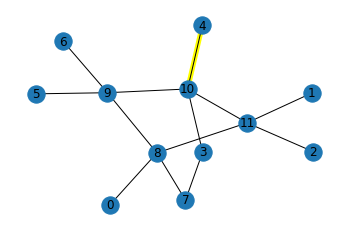

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 58.641975308641946 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 81.79012345679016 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


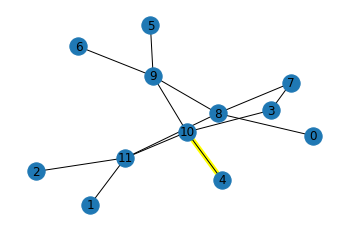

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 60.185185185185155 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 83.33333333333337 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


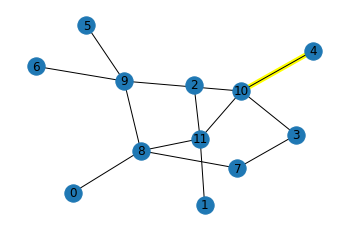

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 61.728395061728364 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 84.87654320987659 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


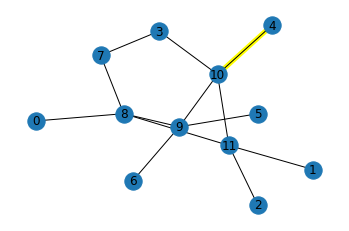

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 63.27160493827157 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 86.4197530864198 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


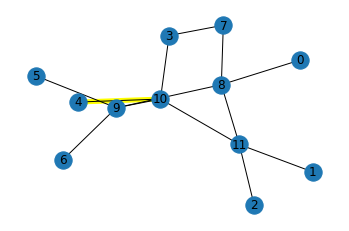

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 64.81481481481478 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 87.96296296296302 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


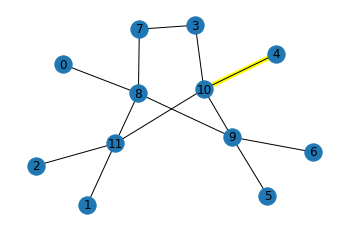

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 66.358024691358 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 89.50617283950623 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


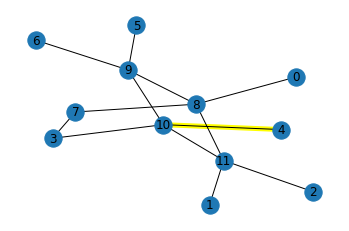

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 67.90123456790121 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 91.04938271604945 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


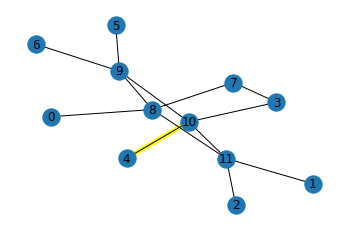

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 69.44444444444443 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 92.59259259259267 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


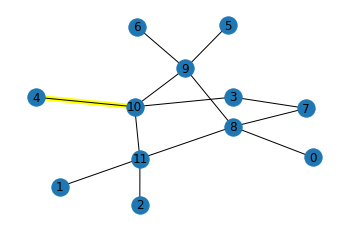

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 70.98765432098764 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 94.13580246913588 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


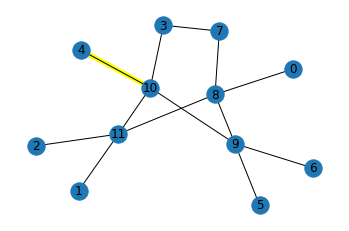

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 72.53086419753086 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 95.6790123456791 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


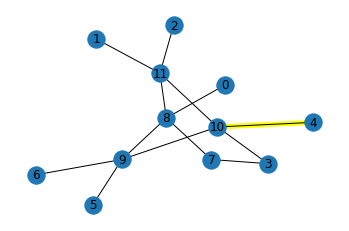

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 74.07407407407408 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 97.22222222222231 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


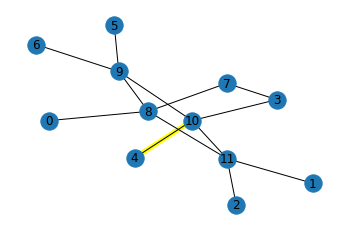

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 75.61728395061729 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 98.76543209876553 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


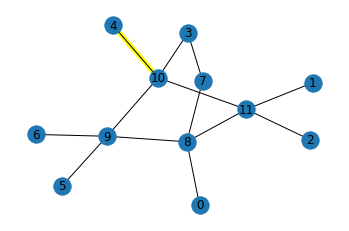

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 77.16049382716051 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


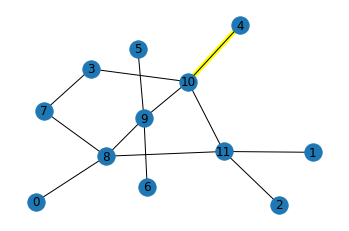

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 78.70370370370372 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


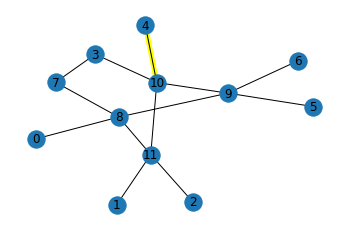

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 80.24691358024694 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


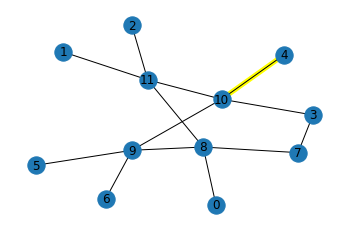

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 81.79012345679016 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


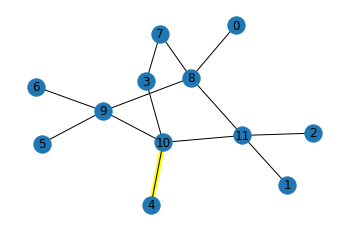

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 83.33333333333337 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


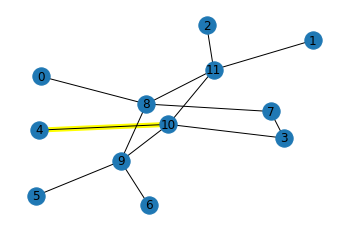

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 84.87654320987659 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


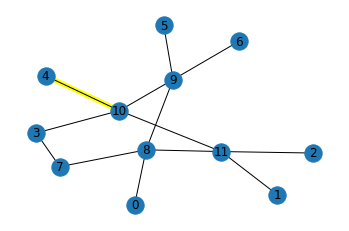

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 86.4197530864198 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


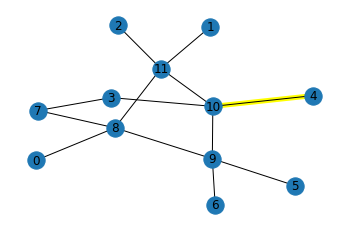

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 87.96296296296302 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


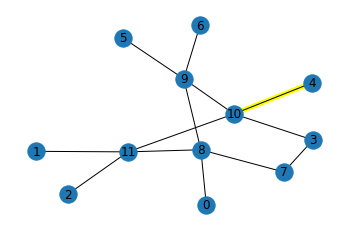

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 89.50617283950623 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


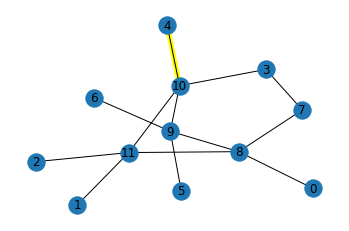

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 91.04938271604945 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


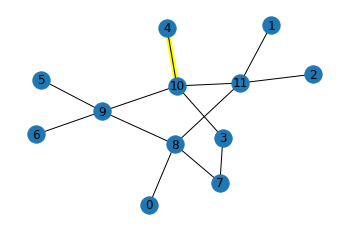

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 92.59259259259267 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


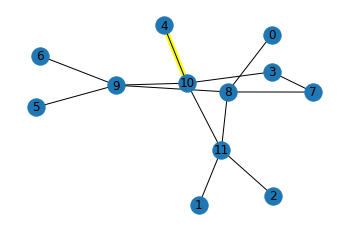

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 94.13580246913588 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


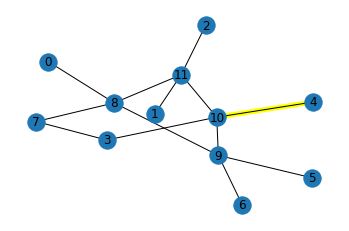

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 95.6790123456791 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


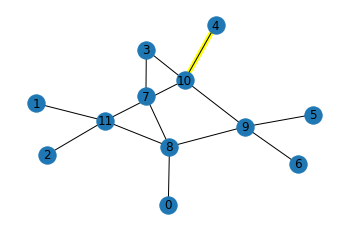

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 97.22222222222231 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


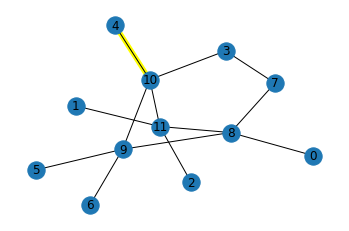

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 98.76543209876553 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


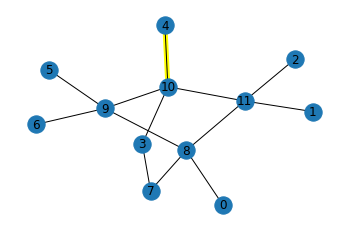

voiture : 0 pourcentage = 100 tuple pos = (10, 3) chemin est [9, 10, 3]
voiture : 1 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 2 pourcentage = 100 tuple pos = (10, 4) chemin est [10, 4]
voiture : 3 pourcentage = 100 tuple pos = (9, 5) chemin est [3, 10, 9, 5]
voiture : 4 pourcentage = 100 tuple pos = (2, 11) chemin est [2, 11]
voiture : 5 pourcentage = 100 tuple pos = (7, 3) chemin est [8, 7, 3]
voiture : 6 pourcentage = 100 tuple pos = (10, 4) chemin est [1, 11, 10, 4]
voiture : 7 pourcentage = 100 tuple pos = (8, 0) chemin est [10, 9, 8, 0]
voiture : 8 pourcentage = 100 tuple pos = (10, 3) chemin est [11, 10, 3]
voiture : 9 pourcentage = 100 tuple pos = (10, 4) chemin est [6, 9, 10, 4]

nombre de voiture sur chaques arretes : {(10, 3): 2, (2, 11): 2, (10, 4): 3, (9, 5): 1, (7, 3): 1, (8, 0): 1}

la route la plus empreintée est : [(10, 4)] avec : 3 voitures


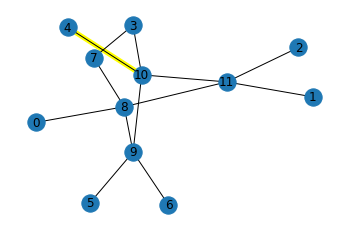

Toutes les voitures sont arrivées
nous pouvons bien voir que la plus haute route est : [(9, 10)]


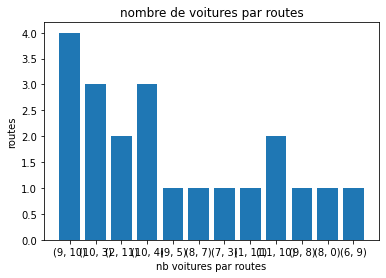

In [116]:
simulation(10,len(ville_1m),ville_1g,2,10,True, True,True)

In [ ]:
simulation(30,len(paris1),ville_paris1,2,10,True,True,True)

In [186]:
def suppression_routes(villeg, nbroutes, Verbose = True) : 
    "fonction qui prend un graph d'une ville et supprime nbroutes routes et renvoie le nouveau graph"
    ville = villeg.copy()
    for i in range(nbroutes): 
        edges = nx.get_edge_attributes(ville,'len')
        listOfKeys = list(edges.keys())
        x = random.randint(0,len(listOfKeys)-1)
        a,b = listOfKeys[x]
        ville.remove_edge(a, b)
        if Verbose : 
            print("edge : ",a,b," removed")
    return ville

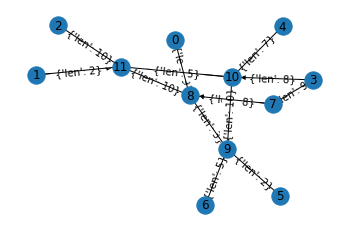

In [187]:
pos = nx.spring_layout(ville_1g)
nx.draw_networkx_edges(ville_1g,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
nx.draw_networkx_edge_labels(ville_1g, pos)
nx.draw(ville_1g, pos, with_labels=True)

edge :  3 10  removed


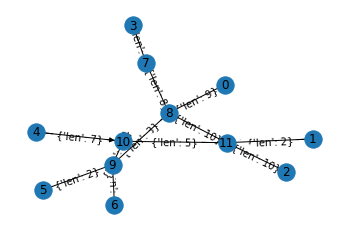

In [188]:
ville2 =suppression_routes(ville_1g,1)
pos = nx.spring_layout(ville2)
nx.draw_networkx_edges(ville2,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
nx.draw_networkx_edge_labels(ville2, pos)
nx.draw(ville2, pos, with_labels=True)

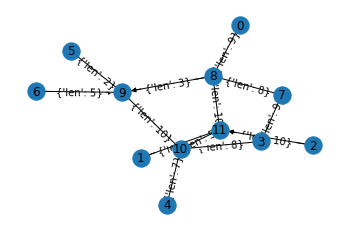

In [189]:
pos = nx.spring_layout(ville_1g)
nx.draw_networkx_edges(ville_1g,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
nx.draw_networkx_edge_labels(ville_1g, pos)
nx.draw(ville_1g, pos, with_labels=True)

In [190]:
def villes_modifiées (villeg, n):
    "renvoie une liste qui contient la ville d'origine et n autres villes ou on a supprimé des villes au hasard"
    L = [villeg]
    for i in range(n): 
        temp = villeg.copy()
        ville = suppression_routes(temp,random.randint(1,2))
        L.append(ville)
    return L

In [194]:
Listdesvilles = villes_modifiées(ville_1g, 5)

edge :  7 8  removed
edge :  6 9  removed
edge :  4 10  removed
edge :  0 8  removed
edge :  3 7  removed
edge :  9 10  removed
edge :  3 10  removed


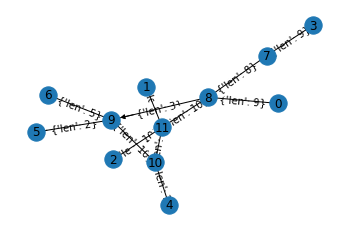

In [196]:
pos = nx.spring_layout(Listdesvilles[5])
nx.draw_networkx_edges(Listdesvilles[5],pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
nx.draw_networkx_edge_labels(Listdesvilles[5], pos)
nx.draw(Listdesvilles[5], pos, with_labels=True)

In [ ]:
def simulations(nbrvoiture, lenghtm, Lvilleg, lenmin, lenmax, verbose=True, mapp = True, stat=True):

## - Il faut absolument trouver une métrique intéressante à quantifier en lien avec le nbr de voiture et les bouchon 
## ex : graphique represntant tout au long de la simu l'évolution du nombre de voiture sur la route ca nous ferai 12 graphiques avec un courbe qui montre l'evolution de nombre de voiture au cours du temps
## ex : histogramme avec en abcisse les edge et en hauteur la quantité totale de voitures passées sur chaqune des edges ( pour ca regarde les different chemins initiaux et compter les tuples qui sont les meme pour chaque voitures 

## Le but serai de : 
## - trouver l'endroit (tuple ) où à l'intant t il y a le plus de voiture de la simulation avec le nb voitures 

## -  supprimer la route avec la fonction hide edge et création d'edge en plus 
## - créer une grande simulation avec genre 10 simulations pour faire des stats

il nous reste à 
- faire les affichages ( couleur sur graph)
- randomiser les trajets ( avec parametre de pourcentage ) 
- creer des exemples en modifiant la route ( une route en plus creer t'il plus de bouchon
- calculer les emissions co2
- si le temps gerer les colisions en accelerant et en ralentissant 
- et plein d autre trucs